# **Homeless Project Introduction**
**Hanxi "Emily" Gu**

Two years back, I made the leap from Beijing to Los Angeles. The initial days were like stepping into a different universe. Passing by streets lined with tents, litter, and people lying on the ground was a surreal experience, one that filled me with a mix of anxiety and fear. My mind raced with images from countless action movies, each scene playing out a different worst-case scenario. But as time wore on, something shifted within me. I began to see beyond the surface, beyond the stereotypes. I started talking to the people I passed by, those who called the streets their home. What I discovered was a community not defined by their circumstances, but by their warmth and resilience. Despite their struggles, they greeted me with smiles and offered well-wishes for the day ahead. These encounters sparked something inside me—a desire to understand their stories, to offer a helping hand where I could. And so, armed with compassion and curiosity, I set out on a journey of research, hoping to shed light on the lives of those often overlooked by society.

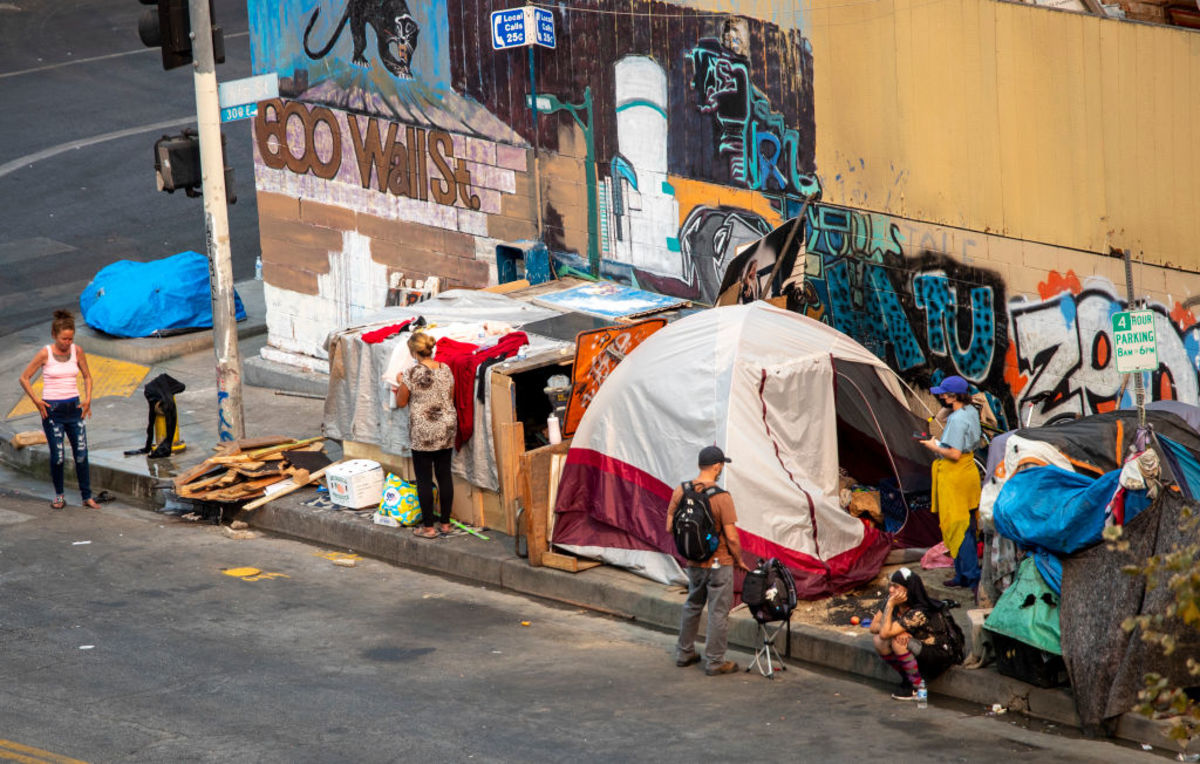

# **Data Source**

**Homeless**

*   Homeless Data: 2007 - 2023 Point-in-Time Estimates by CoC (XLSB) from the Office of Policy Development and Research. Data available at: https://www.huduser.gov/portal/datasets/ahar/2023-ahar-part-1-pit-estimates-of-homelessness-in-the-us.html.

*   Population Data: QuickFacts from U.S. Census Bureau. Data available at: https://www.census.gov/quickfacts/fact/table/US/PST045223.

**Socioeconomic Variables**

*   Unemployment Rate: Tables from U.S. Census Bureau. Data available at: https://www.census.gov/library/publications/2023/demo/p60-280.html.


*   Poverty Rate: Tables from World Bank. Data available at: https://www.macrotrends.net/countries/USA/united-states/poverty-rate.


*   Median Household Income: Tables from FRED Economic Data. Data available at: https://fred.stlouisfed.org/series/MEHOINUSA672N.

**Policy and Government Intervention**

*   Homelessness Assistance Grants: Tables from the Office of Policy Development and Research. https://archives.hud.gov/, https://www.hud.gov/ and https://sgp.fas.org/crs/misc/RL33764.pdf.

**Demographic Factors**

*   Educational Attainment: American Community Survey from U.S. Census Bureau. Data Available at: https://data.census.gov/table/ACSST1Y2022.S1501

*   Health Status: Substance use and mental health data from SAMHSA - Substance Abuse and Mental Health Services Administration. Data available at: https://datatools.samhsa.gov/.

**Housing Market Dynamics**

*   Fair Market Rent: Tables from the Office of Policy Development and Research. Data available at: https://www.huduser.gov/portal/datasets/fmr.html#history.

**Environmental Factors**

*   Total Environmental Damage: Tables from National Weather Service. Data available at: www.weather.gov.

**Economic Indicators**

*   GDP Growth Rate: Tables from Bureau of Economic Analysis. Data available at: https://www.bea.gov/data/gdp/gross-domestic-product.

*   Consumer Price Index: Tables from U.S. Bureau of Labor Statistics. Data available at: https://www.bls.gov/cpi/.


# **Data Loading**

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import f_oneway
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# Read the data from a pre-processed Excel file
df = pd.read_excel('homeless_upload.xlsx')

In [3]:
# Display dataframe
df.columns

Index(['Year', 'CoC Number', 'CoC Name', 'CoC Category', 'Count Types',
       'Overall Homeless', 'Overall Homeless - Under 18',
       'Overall Homeless - Age 18 to 24', 'Overall Homeless - Over 24',
       'Overall Homeless - Age 25 to 34',
       ...
       'Overall Homeless Parenting Youth Age 18-24',
       'Sheltered ES Homeless Parenting Youth Age 18-24',
       'Sheltered TH Homeless Parenting Youth Age 18-24',
       'Sheltered Total Homeless Parenting Youth Age 18-24',
       'Unsheltered Homeless Parenting Youth Age 18-24',
       'Overall Homeless Children of Parenting Youth',
       'Sheltered ES Homeless Children of Parenting Youth',
       'Sheltered TH Homeless Children of Parenting Youth',
       'Sheltered Total Homeless Children of Parenting Youth',
       'Unsheltered Homeless Children of Parenting Youth'],
      dtype='object', length=663)

In [4]:
# Convert columns to numeric
columns_to_convert = [col for col in df.columns if col not in
                      ['Year', 'CoC Number', 'CoC Name', 'CoC Category', 'Count Types']]
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# **Trends Over Time**

### **Trends in Homelessness by Sheltered Status**

In [5]:
# Extract relevant columns for Trends Over Time analysis
trends_data = df[['Year', 'Overall Homeless', 'Sheltered Total Homeless', 'Unsheltered Homeless']]

In [6]:
# Group the data by year and calculate the sum of each column
trends_data = trends_data.groupby('Year').sum()
trends_data

,Overall Homeless,Sheltered Total Homeless,Unsheltered Homeless
Year,,,
2007,647258,391401,255857
2008,639784,386361,253423
2009,630227,403308,226919
2010,637077,403543,233534
2011,623788,392316,231472
2012,621553,390155,231398
2013,590364,394698,195666
2014,576450,401051,175399
2015,564708,391440,173268


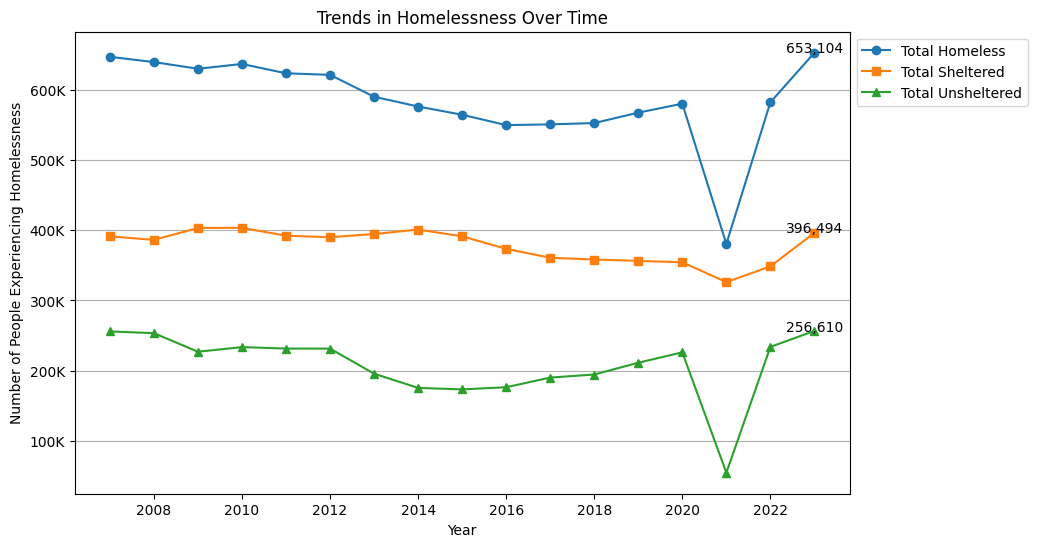

In [7]:
# Plot the trends over time
plt.figure(figsize=(10, 6))
plt.plot(trends_data.index, trends_data['Overall Homeless'],
         marker='o', label='Total Homeless')
plt.plot(trends_data.index, trends_data['Sheltered Total Homeless'],
         marker='s', label='Total Sheltered')
plt.plot(trends_data.index, trends_data['Unsheltered Homeless'],
         marker='^', label='Total Unsheltered')

# Annotate only the last point
last_year = trends_data.index[-1]
plt.text(last_year, trends_data.loc[last_year, 'Overall Homeless'],
         '{:,.0f}'.format(trends_data.loc[last_year, 'Overall Homeless']), ha='center')
plt.text(last_year, trends_data.loc[last_year, 'Sheltered Total Homeless'],
         '{:,.0f}'.format(trends_data.loc[last_year, 'Sheltered Total Homeless']), ha='center')
plt.text(last_year, trends_data.loc[last_year, 'Unsheltered Homeless'],
         '{:,.0f}'.format(trends_data.loc[last_year, 'Unsheltered Homeless']), ha='center')


plt.xlabel('Year')
plt.ylabel('Number of People Experiencing Homelessness')
plt.title('Trends in Homelessness Over Time')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(axis='y')
plt.gca().yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
plt.show()

* The notable decline observed in 2021 can be attributed to
disruptions caused by the pandemic, which likely affected the accuracy and consistency of homelessness counts across the United States. The 2021 data will be omitted in the following research sections.

* This decline represents a deviation from the overall trend, which saw the number of individuals experiencing homelessness reach its nadir at approximately 550,000 in 2016, followed by a steady upward trajectory in subsequent years.

In [8]:
# Drop 2021 data
trends_data = trends_data.drop(2021, axis=0)
df = df[df['Year'] != 2021]

### **Change in Homelessness by Sheltered Status**

In [9]:
# Calculate percentages
trends_data['Sheltered Percentage'] = (trends_data['Sheltered Total Homeless']
                                       / trends_data['Overall Homeless']) * 100
trends_data['Unsheltered Percentage'] = (trends_data['Unsheltered Homeless']
                                       / trends_data['Overall Homeless']) * 100

# Calculate percentage change
trends_data['Sheltered Change'] = trends_data['Sheltered Percentage'].pct_change() * 100
trends_data['Unsheltered Change'] = trends_data['Unsheltered Percentage'].pct_change() * 100


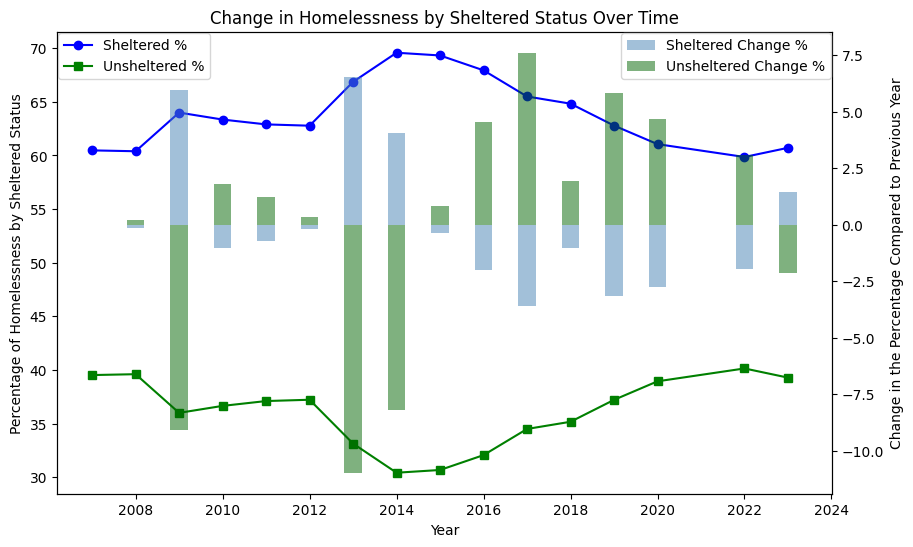

In [10]:
# Plot layout
fig, ax1 = plt.subplots(figsize=(10, 6))

# Line plots for sheltered and unsheltered percentages
ax1.plot(trends_data.index, trends_data['Sheltered Percentage'], color='blue',
         marker='o', label='Sheltered %')
ax1.plot(trends_data.index, trends_data['Unsheltered Percentage'], color='green',
         marker='s', label='Unsheltered %')
ax1.set_xlabel('Year')
ax1.set_ylabel('Percentage of Homelessness by Sheltered Status', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_title('Change in Homelessness by Sheltered Status Over Time')
ax1.legend(loc='upper left', borderaxespad=0.1)

# Bar plots for percentage change
ax2 = ax1.twinx()
ax2.bar(trends_data.index[1:], trends_data['Sheltered Change'][1:],
        color='steelblue', width=0.4, alpha=0.5, label='Sheltered Change %')
ax2.bar(trends_data.index[1:], trends_data['Unsheltered Change'][1:],
        color='darkgreen', width=0.4, alpha=0.5, label='Unsheltered Change %')
ax2.set_ylabel('Change in the Percentage Compared to Previous Year', color='black')
ax2.tick_params(axis='y', labelcolor='black')
ax2.legend(loc='upper right', borderaxespad=0.1)

# Plot grid
plt.grid(False)
plt.show()

* In 2007, the data indicates that approximately 60.47% of the overall homeless population had access to shelter, while 39.53% were unsheltered, figures that remained relatively consistent with those observed in 2023. However, notable fluctuations occurred within the intervening years.

* A particularly noteworthy trend emerged in 2013, where there was a substantial decrease of approximately 10.97% in the percentage of unsheltered homeless individuals compared to the preceding year, marking the most significant decline recorded throughout the observed period.

* Subsequent to this decline, the data portrays a consistent upward trajectory in the percentage of unsheltered homeless individuals from 2014 onwards. This increasing trend persisted until 2022, culminating in a notable reversal in 2023, where a decrease in the percentage of unsheltered individuals was observed.

* The main driver of this increasing trend is largely the result of failed policies.

### **CoCs with the Largest Numbers of People Experiencing Homelessness**

In [11]:
# Filter the DataFrame for the year 2023
df_2023 = df[df['Year'] == 2023]

# Group the data by CoC Category and find the top 5 values of Overall Homeless for each group
top_5_overall_homeless = df_2023.groupby('CoC Category').apply(
    lambda x: x.nlargest(5, 'Overall Homeless'))

# Display the CoC Category, CoC Name, and Overall Homeless for the top 5 values in each group
result = top_5_overall_homeless[['CoC Name', 'Overall Homeless']]
result

CoC Name  \
CoC Category                                                                     
Largely Rural CoC       343                         Texas Balance of State CoC   
                        371                    Washington Balance of State CoC   
                        98                        Georgia Balance of State CoC   
                        300                        Oregon Balance of State CoC   
                        133                       Indiana Balance of State CoC   
Largely Suburban CoC    51                Santa Ana, Anaheim/Orange County CoC   
                        159                 Massachusetts Balance of State CoC   
                        57                    San Bernardino City & County CoC   
                        108                       Honolulu City and County CoC   
                        56                         Riverside City & County CoC   
Major City CoC          271                                  New York City CoC   
                        49                       Los Angeles City & County CoC   
                        370                            Seattle/King County CoC   
                        50                       San Diego City and County CoC   
                        63                             Metropolitan Denver CoC   
Other Largely Urban CoC 295                Eugene, Springfield/Lane County CoC   
                        58         Oxnard, San Buenaventura/Ventura County CoC   
                        372                          Spokane City & County CoC   
                        22              Santa Rosa, Petaluma/Sonoma County CoC   
                        72   St. Petersburg, Clearwater, Largo/Pinellas Cou...   

                             Overall Homeless  
CoC Category                                   
Largely Rural CoC       343              9065  
                        371              6764  
                        98               6388  
                        300              5365  
                        133              4398  
Largely Suburban CoC    51               6050  
                        159              4432  
                        57               4195  
                        108              4028  
                        56               3725  
Major City CoC          271             88025  
                        49              71320  
                        370             14149  
                        50              10264  
                        63              10054  
Other Largely Urban CoC 295              2824  
                        58               2441  
                        372              2390  
                        22               2266  
                        72               2144

# **Demographic Analysis**

### **Age**
2023 data includes:

*   Sheltered Total Homeless - Under 18
*   Sheltered Total Homeless - Age 18 to 24
*   Sheltered Total Homeless - Over 24
*   Sheltered Total Homeless - Age 25 to 34
*   Sheltered Total Homeless - Age 35 to 44
*   Sheltered Total Homeless - Age 45 to 54
*   Sheltered Total Homeless - Age 55 to 64
*   Sheltered Total Homeless - Over 64

2013 - 2022 data includes:

*   Sheltered Total Homeless - Under 18
*   Sheltered Total Homeless - Age 18 to 24
*   Sheltered Total Homeless - Over 24


No age data is available before 2013.

In [12]:
# Selecting the columns
selected_columns = ['Year',
                    'Sheltered Total Homeless - Under 18',
                    'Sheltered Total Homeless - Age 18 to 24',
                    'Sheltered Total Homeless - Over 24',
                    'Unsheltered Homeless - Under 18',
                    'Unsheltered Homeless - Age 18 to 24',
                    'Unsheltered Homeless - Over 24']

# Creating a new DataFrame with selected columns
age_data = df[selected_columns]

In [13]:
# Change column names for better result display
new_column_names = ['Year',
                    'S<18',
                    'S=18-24',
                    'S>24',
                    'U<18',
                    'U=18-24',
                    'U>24']

age_data.columns = new_column_names

In [14]:
# Filtering data for years 2013 to 2023
age_data = age_data[(age_data['Year'] >= 2013) & (age_data['Year'] <= 2023)]

In [15]:
# Grouping the selected data by year and summing the values
age_data = age_data.groupby('Year').sum()
age_data

,S<18,S=18-24,S>24,U<18,U=18-24,U>24
Year,,,,,,
2013,117741.0,38879.0,238078.0,20405.0,20919.0,154342.0
2014,119291.0,38853.0,242907.0,16410.0,19190.0,139799.0
2015,114477.0,36080.0,240883.0,13310.0,16893.0,143065.0
2016,108866.0,33281.0,231424.0,11953.0,16720.0,147684.0
2017,103289.0,31742.0,225836.0,11240.0,19250.0,159639.0
2018,101086.0,30154.0,227123.0,10506.0,18165.0,165796.0
2019,97153.0,28840.0,230429.0,9916.0,16789.0,184588.0
2020,95713.0,28213.0,230460.0,10651.0,17030.0,198399.0
2022,87960.0,26981.0,233689.0,10284.0,13196.0,210352.0


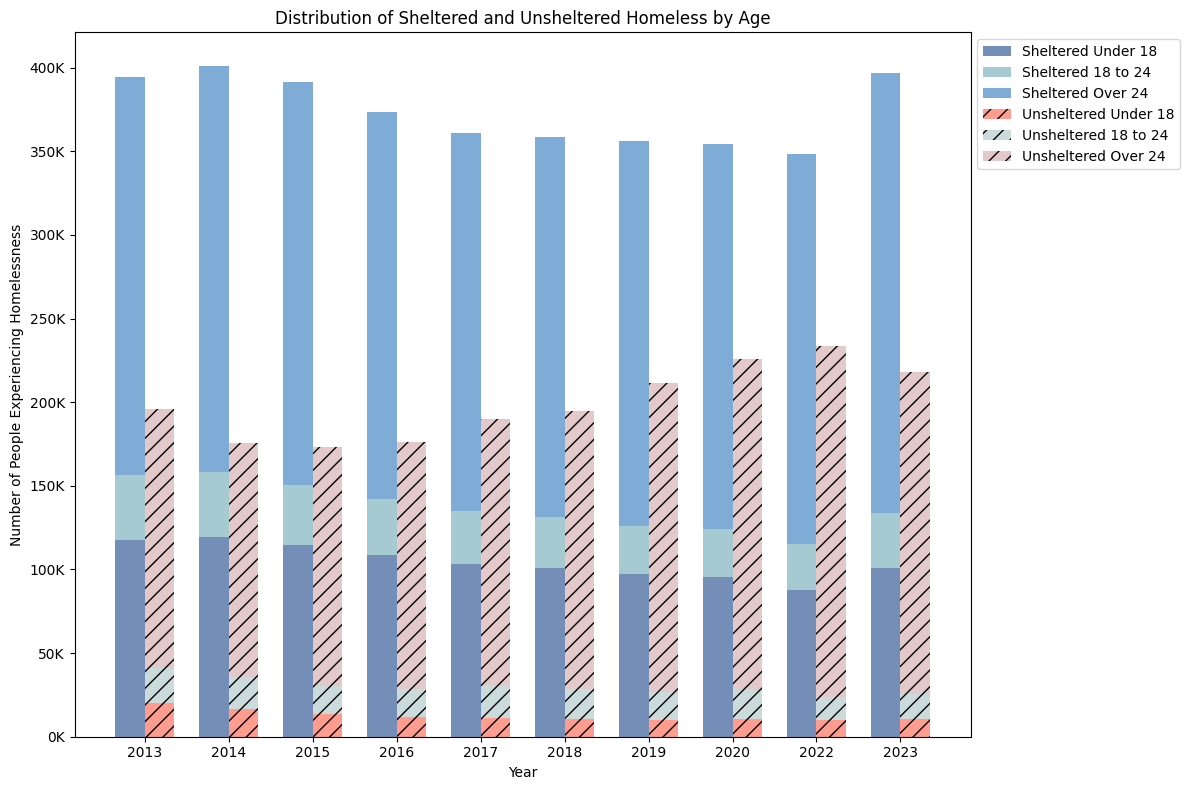

In [16]:
# Define custom colors for the bars
sheltered_colors = ['#758eb7', '#a5cad2', '#7facd6']
unsheltered_colors = ['#fe9c8f', '#cbdadb', '#e3c9c9']

# Setting up the figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

# Extracting the columns for each category
sheltered_under_18 = age_data['S<18']
sheltered_18_to_24 = age_data['S=18-24']
sheltered_over_24 = age_data['S>24']
unsheltered_under_18 = age_data['U<18']
unsheltered_18_to_24 = age_data['U=18-24']
unsheltered_over_24 = age_data['U>24']

# Creating clustered bars for sheltered homeless
bar_width = 0.35
bar_years = np.arange(len(age_data))
sheltered_bars = ax.bar(bar_years - bar_width/2, sheltered_under_18,
                        width=bar_width, label='Sheltered Under 18',
                        color=sheltered_colors[0])
ax.bar(bar_years - bar_width/2, sheltered_18_to_24, bottom=sheltered_under_18,
       width=bar_width, label='Sheltered 18 to 24', color=sheltered_colors[1])
ax.bar(bar_years - bar_width/2, sheltered_over_24,
       bottom=sheltered_under_18 + sheltered_18_to_24, width=bar_width,
       label='Sheltered Over 24', color=sheltered_colors[2])

# Creating clustered bars for unsheltered homeless
unsheltered_bars = ax.bar(bar_years + bar_width/2, unsheltered_under_18,
                          width=bar_width, label='Unsheltered Under 18',
                          hatch='//', color=unsheltered_colors[0])
ax.bar(bar_years + bar_width/2, unsheltered_18_to_24,
       bottom=unsheltered_under_18, width=bar_width,
       label='Unsheltered 18 to 24', hatch='//', color=unsheltered_colors[1])
ax.bar(bar_years + bar_width/2, unsheltered_over_24,
       bottom=unsheltered_under_18 + unsheltered_18_to_24, width=bar_width,
       label='Unsheltered Over 24', hatch='//', color=unsheltered_colors[2])

# Adding labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Number of People Experiencing Homelessness')
ax.set_title('Distribution of Sheltered and Unsheltered Homeless by Age')

# Setting x-axis ticks and labels
ax.set_xticks(bar_years)
ax.set_xticklabels(age_data.index)

# Adding legend
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.gca().yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
plt.tight_layout()
plt.show()

In [17]:
# Selecting the specified variables from the DataFrame
selected_columns = [ 'Year',
    'Sheltered Total Homeless Individuals - Under 18',
    'Sheltered Total Homeless Individuals - Age 18 to 24',
    'Sheltered Total Homeless Individuals - Age 25 to 34',
    'Sheltered Total Homeless Individuals - Age 35 to 44',
    'Sheltered Total Homeless Individuals - Age 45 to 54',
    'Sheltered Total Homeless Individuals - Age 55 to 64',
    'Sheltered Total Homeless Individuals - Over 64',
    'Sheltered ES Homeless Individuals - Under 18',
    'Sheltered ES Homeless Individuals - Age 18 to 24',
    'Sheltered ES Homeless Individuals - Age 25 to 34',
    'Sheltered ES Homeless Individuals - Age 35 to 44',
    'Sheltered ES Homeless Individuals - Age 45 to 54',
    'Sheltered ES Homeless Individuals - Age 55 to 64',
    'Sheltered ES Homeless Individuals - Over 64',
    'Sheltered TH Homeless Individuals - Under 18',
    'Sheltered TH Homeless Individuals - Age 18 to 24',
    'Sheltered TH Homeless Individuals - Age 25 to 34',
    'Sheltered TH Homeless Individuals - Age 35 to 44',
    'Sheltered TH Homeless Individuals - Age 45 to 54',
    'Sheltered TH Homeless Individuals - Age 55 to 64',
    'Sheltered TH Homeless Individuals - Over 64',
    'Sheltered SH Homeless Individuals - Under 18',
    'Sheltered SH Homeless Individuals - Age 18 to 24',
    'Sheltered SH Homeless Individuals - Age 25 to 34',
    'Sheltered SH Homeless Individuals - Age 35 to 44',
    'Sheltered SH Homeless Individuals - Age 45 to 54',
    'Sheltered SH Homeless Individuals - Age 55 to 64',
    'Sheltered SH Homeless Individuals - Over 64'
]

# Creating a new DataFrame with selected columns
age_data_2023 = df[selected_columns]

In [18]:
# Filtering data for years 2023
age_data_2023 = age_data_2023[age_data_2023['Year'] == 2023]

In [19]:
# Define the age groups
age_groups = [
    'Under 18',
    'Age 18 to 24',
    'Age 25 to 34',
    'Age 35 to 44',
    'Age 45 to 54',
    'Age 55 to 64',
    'Over 64'
]

# Define the ES, TH, and SH categories: Emergency Shelter, Transitional Housing, and Safe Haven
categories = ['ES', 'TH', 'SH']

# Initialize a DataFrame to store the proportions
proportion_df = pd.DataFrame(index=age_groups, columns=categories)

# Calculate the proportions
for category in categories:
    for age_group in age_groups:
        sheltered_col = f'Sheltered {category} Homeless Individuals - {age_group}'
        total_col = f'Sheltered Total Homeless Individuals - {age_group}'
        proportion = (age_data_2023[sheltered_col].sum() / age_data_2023[total_col].sum()) * 100
        proportion_df.loc[age_group, category] = "{:.2f}%".format(proportion)

proportion_df

,ES,TH,SH
Under 18,76.00%,24.00%,0.00%
Age 18 to 24,71.87%,27.99%,0.15%
Age 25 to 34,84.42%,15.07%,0.51%
Age 35 to 44,84.36%,14.82%,0.82%
Age 45 to 54,85.18%,13.98%,0.84%
Age 55 to 64,83.13%,15.54%,1.32%
Over 64,80.58%,17.80%,1.62%



### **Ethnicity/Race**

In [20]:
# Filter the data for the year 2023
df_2023 = df[df['Year'] == 2023]

# Define the races
races = [
    'Hispanic/Latin(o)(a)(x)',
    'White',
    'Black, African American, or African',
    'Asian or Asian American',
    'American Indian, Alaska Native, or Indigenous',
    'Native Hawaiian or Other Pacific Islander',
    'Multiple Races'
]

# Get the total number of overall homeless individuals in 2023
total_homeless_2023 = df_2023['Overall Homeless'].sum()

# Get the counts for each race in 2023
race_counts_2023 = [
    df_2023['Overall Homeless - Hispanic/Latin(o)(a)(x)'].sum(),
    df_2023['Overall Homeless - White'].sum(),
    df_2023['Overall Homeless - Black, African American, or African'].sum(),
    df_2023['Overall Homeless - Asian or Asian American'].sum(),
    df_2023['Overall Homeless - American Indian, Alaska Native, or Indigenous'].sum(),
    df_2023['Overall Homeless - Native Hawaiian or Other Pacific Islander'].sum(),
    df_2023['Overall Homeless - Multiple Races'].sum()
]

# Calculate the percentage of each race in 2023
race_percentages_2023 = [count / total_homeless_2023 * 100 for count in race_counts_2023]

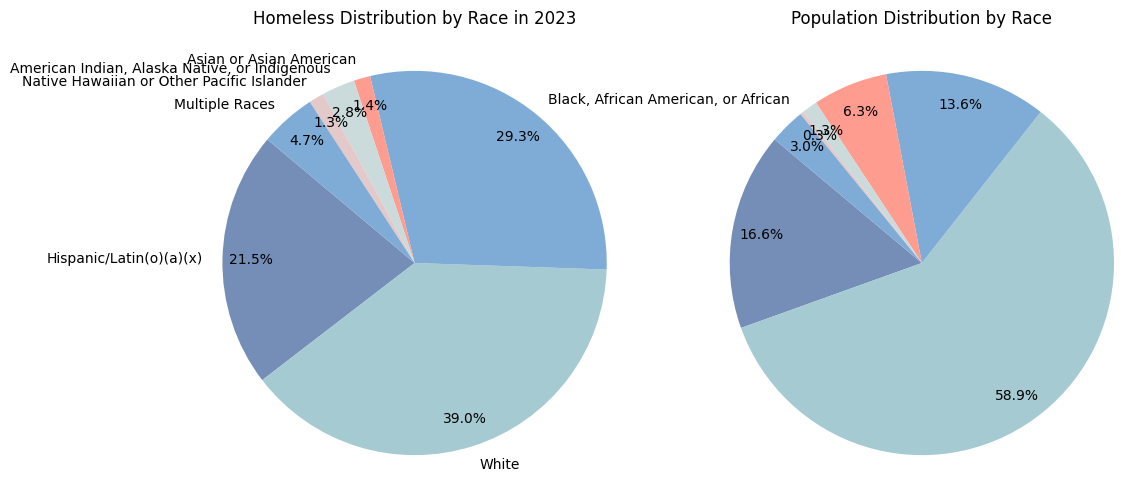

In [21]:
# Get population by race data from US Cencus Bureau
population_percentages = [16.6, 58.9, 13.6, 6.3, 1.3, 0.3, 3.0]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
custom_colors = ['#758eb7', '#a5cad2', '#7facd6', '#fe9c8f',
                 '#cbdadb', '#e3c9c9', '#7facd6']

# Plot for homeless distribution by race in 2023
axes[0].pie(race_percentages_2023, labels=races, autopct='%1.1f%%',
            startangle=140, pctdistance=0.85, colors=custom_colors)
axes[0].set_title('Homeless Distribution by Race in 2023')
axes[0].axis('equal')

# Plot for population distribution by race in 2023
axes[1].pie(population_percentages, autopct='%1.1f%%', startangle=140,
            pctdistance=0.85, colors=custom_colors)
axes[1].set_title('Population Distribution by Race')
axes[1].axis('equal')

plt.show()

* Compared to the portion of the U.S. population, people of color are overrepresented in the population experiencing homelessness.

### **Veteran**

In [22]:
# Filter data for the year 2023
veteran_data = df[df['Year'] == 2023]

# Select columns for comparison
groups = ['Overall Homeless Veterans - Hispanic/Latin(o)(a)(x)',
          'Overall Homeless Veterans - White',
          'Overall Homeless Veterans - Black, African American, or African',
          'Overall Homeless Veterans - Asian or Asian American',
          'Overall Homeless Veterans - American Indian, Alaska Native, or Indigenous',
          'Overall Homeless Veterans - Native Hawaiian or Other Pacific Islander',
          'Overall Homeless Veterans - Multiple Races']

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(*[veteran_data[group] for group in groups])

# Print results
print("One-Way ANOVA Results:")
print("F-Statistic:", f_statistic)
print("P-Value:", p_value)

One-Way ANOVA Results:
F-Statistic: 40.95328110218599
P-Value: 5.65140858839625e-48


* The one-way ANOVA test yielded a statistically significant result. The F-statistic value is 40.95, indicating that there is a significant difference between the means of the groups being compared. Additionally, the p-value associated with the test is very small (5.65e-48), much less than the conventional significance level of 0.05. This suggests strong evidence against the null hypothesis, indicating that at least one group mean is significantly different from the others.

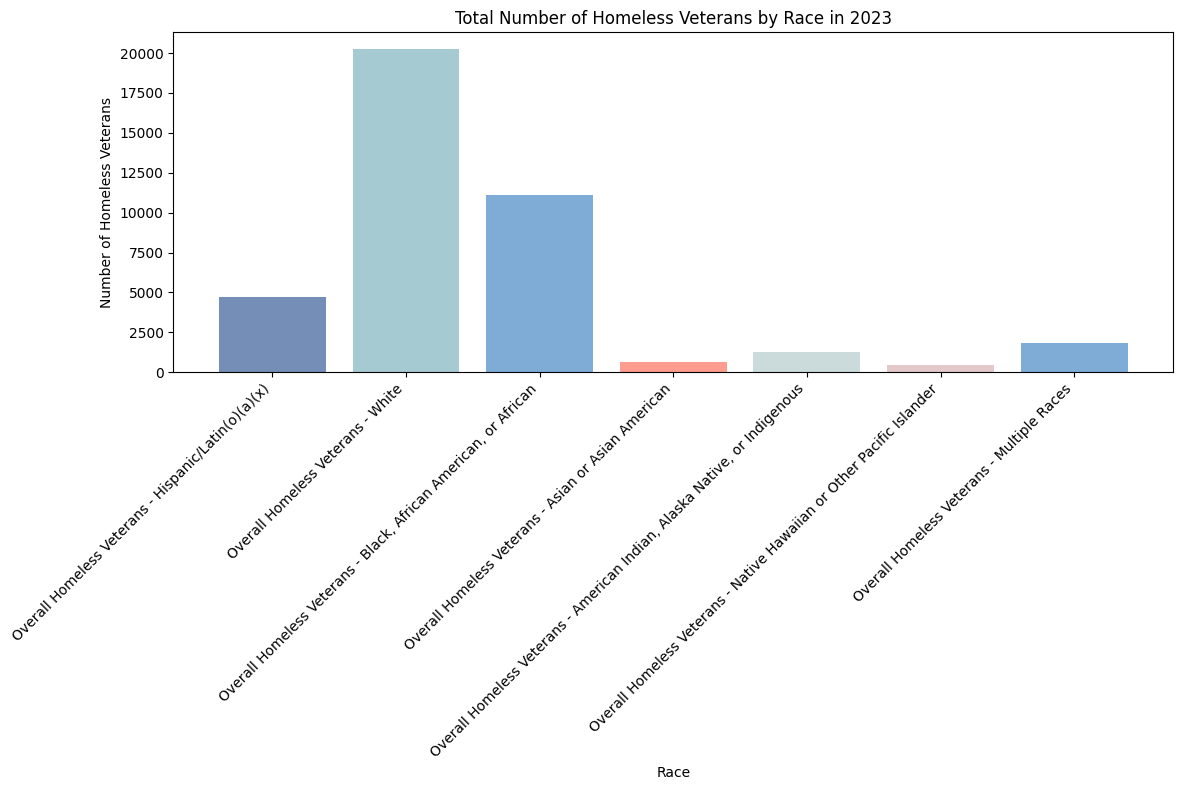

In [23]:
# Plotting each column separately
plt.figure(figsize=(12, 8))
for i, column in enumerate(groups):
    plt.bar(column, veteran_data[column].sum(), color=custom_colors[i])

plt.xlabel('Race')
plt.ylabel('Number of Homeless Veterans')
plt.title('Total Number of Homeless Veterans by Race in 2023')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# **Modeling**

* In accordance with findings from *Market Predictors of Homelessness: How Housing and Community Factors Shape Homelessness Rates Within Continuums of Care* (https://www.huduser.gov/portal/datasets/hpmd.html), as published by the Office of Policy Development and Research, this modeling phase incorporates critical determinants.

In [24]:
# Group by 'Year' and calculate the sum of 'Overall Homeless'
model_data = df.groupby('Year')['Overall Homeless'].sum().reset_index()

### **Socioeconomic Variables**

*   Unemployment Rate (%): Higher unemployment rates can lead to increased homelessness.
*   Poverty Rate (%): Areas with higher poverty rates may have higher rates of homelessness.
*   Median Household Income ($): Lower median incomes within a community can contribute to homelessness, as individuals and families may struggle to afford housing and basic necessities.

In [25]:
# Provided unemployment rate data
unemployment_rates = {
    2007: 4.616666667,
    2008: 5.8,
    2009: 9.283333333,
    2010: 9.608333333,
    2011: 8.933333333,
    2012: 8.075,
    2013: 7.358333333,
    2014: 6.158333333,
    2015: 5.275,
    2016: 4.875,
    2017: 4.358333333,
    2018: 3.891666667,
    2019: 3.675,
    2020: 8.091666667,
    2022: 3.633333333,
    2023: 3.625
}

# Add a new column 'Unemployment Rate' to model_data based on the 'Year'
model_data['Unemployment Rate'] = model_data['Year'].map(unemployment_rates)

In [26]:
# Provided poverty rate data
poverty_rates = {
    2007: 12.50,
    2008: 13.20,
    2009: 14.30,
    2010: 15.30,
    2011: 15.90,
    2012: 15.90,
    2013: 14.50,
    2014: 14.80,
    2015: 13.50,
    2016: 12.70,
    2017: 12.50,
    2018: 11.80,
    2019: 10.50,
    2020: 11.40,
    2022: 11.50,
    2023: 11.50
}

# Add a new column 'Poverty Rate' to model_data based on the 'Year'
model_data['Poverty Rate'] = model_data['Year'].map(poverty_rates)

In [27]:
# Provided median household income data
median_income = {
    2007: 68610,
    2008: 66280,
    2009: 65850,
    2010: 64300,
    2011: 63350,
    2012: 63350,
    2013: 65740,
    2014: 64900,
    2015: 68410,
    2016: 70840,
    2017: 72090,
    2018: 73030,
    2019: 78250,
    2020: 76660,
    2022: 74580,
    2023: 75143
}

# Add a new column 'Median Household Income' to model_data based on the 'Year'
model_data['Median Household Income'] = model_data['Year'].map(median_income)

### **Policy and Government Intervention**



*   Homelessness Assistance Grants ($): It supports efforts to prevent and reduce homelessness in communities across the nation, is the federal government’s most important homelessness funding source.


In [28]:
# Provided homeless assistance grant data
homeless_assistance_grants = {
    2007: 1535990000,
    2008: 1541081000,
    2009: 1677000000,
    2010: 1865000000,
    2011: 1901190000,
    2012: 1901190000,
    2013: 1933293000,
    2014: 2105000000,
    2015: 2135000000,
    2016: 2480000000,
    2017: 2664000000,
    2018: 2383000000,
    2019: 2636000000,
    2020: 2777000000,
    2022: 3000000000,
    2023: 3576000000
}

# Add a new column 'Homeless Assistance Grant' to model_data based on the 'Year'
model_data['Homeless Assistance Grants'] = model_data['Year'].map(homeless_assistance_grants)

### **Demographic Factors**



*   Educational Attainment (Population 25 years and over with Bachelor's degree or higher) (%): Higher levels of education may correlate with lower rates of homelessness.
*   Health status (During the past 12 months, had any mental illness (AMI) and substance use disorder (SUD) (DSM-5)) (%): Mental health issues, substance abuse, and physical disabilities can contribute to homelessness.



In [29]:
# Provided education attainment data
education_attainment = {
    2007: 29.2,
    2008: 29.1,
    2009: 29.6,
    2010: 28.2,
    2011: 28.5,
    2012: 29.1,
    2013: 29.6,
    2014: 30.1,
    2015: 30.6,
    2016: 31.3,
    2017: 32.0,
    2018: 32.6,
    2019: 33.1,
    2020: 35.1,
    2022: 35.7,
    2023: 36.4
}

# Add a new column 'Education Attainment' to model_data based on the 'Year'
model_data['Education Attainment'] = model_data['Year'].map(education_attainment)

In [30]:
# Provided health status data
health_status = {
    2007: 3.02,
    2008: 3.39,
    2009: 3.43,
    2010: 3.47,
    2011: 3.00,
    2012: 3.65,
    2013: 3.35,
    2014: 3.22,
    2015: 3.27,
    2016: 3.42,
    2017: 3.45,
    2018: 3.62,
    2019: 3.79,
    2020: 6.60,
    2022: 8.47,
    2023: 8.47
}

# Add a new column 'Health Status' to model_data based on the 'Year'
model_data['Health Status'] = model_data['Year'].map(health_status)

### **Housing Market Dynamics**

*   Fair Market Rent (2-bedroom unit data, considering both individuals and families are experiencing homelessness) ($): Increases in housing costs can make it more difficult for individuals to afford stable
housing.

In [31]:
# Provided fair market rent data
fair_market_rent = {
    2007: 665.1019162,
    2008: 707.3826069,
    2009: 728.2571068,
    2010: 749.8544957,
    2011: 760.8245688,
    2012: 740.1051746,
    2013: 788.6378549,
    2014: 786.2927445,
    2015: 806.6496427,
    2016: 828.4529412,
    2017: 855.154492,
    2018: 881.6691856,
    2019: 904.2770781,
    2020: 924.4382872,
    2022: 997.5342149,
    2023: 1095.893367
}

# Add a new column 'Fair Market Rent' to model_data based on the 'Year'
model_data['Fair Market Rent'] = model_data['Year'].map(fair_market_rent)

### **Environmental Factors:**

*  Total Envrinonmental Damage ($): Events like hurricanes, floods, or wildfires can lead to temporary or long-term homelessness.

In [32]:
# Provided total environmental damage data
total_environmental_damage = {
    2007: 12240850000,
    2008: 30324120000,
    2009: 7459470000,
    2010: 11704500000,
    2011: 24182690000,
    2012: 38876370000,
    2013: 13192390000,
    2014: 7695020000,
    2015: 4847120000,
    2016: 18438000000,
    2017: 89290720000,
    2018: 40951860000,
    2019: 7657010000,
    2020: 27311250000,
    2022: 21804420000,
    2023: 11727070000
}

# Add a new column 'Total Environmental Damage' to model_data based on the 'Year'
model_data['Total Environmental Damage'] = model_data['Year'].map(total_environmental_damage)

### **Economic Indicators**

*   GDP Growth (%): Economic growth and stability can impact employment opportunities and housing affordability.
*   Consumer Price Index (%): Rising prices can affect the cost of living and housing affordability.


In [33]:
# Provided GDP growth rate data
gdp_growth_rate = {
    2007: 2.0,
    2008: 0.1,
    2009: -2.6,
    2010: 2.7,
    2011: 1.5,
    2012: 2.3,
    2013: 1.8,
    2014: 2.3,
    2015: 2.7,
    2016: 1.7,
    2017: 2.2,
    2018: 2.9,
    2019: 2.3,
    2020: -2.8,
    2022: 1.9,
    2023: 2.5
}

# Add a new column 'GDP Growth Rate' to model_data based on the 'Year'
model_data['GDP Growth Rate'] = model_data['Year'].map(gdp_growth_rate)

In [34]:
# Provided consumer price index data
consumer_price_index = {
    2007: 2.9,
    2008: 3.8,
    2009: -0.4,
    2010: 1.6,
    2011: 3.2,
    2012: 2.1,
    2013: 1.5,
    2014: 1.6,
    2015: 0.1,
    2016: 1.3,
    2017: 2.1,
    2018: 2.4,
    2019: 1.8,
    2020: 1.2,
    2022: 8.0,
    2023: 4.1
}

# Add a new column 'Consumer Price Index' to model_data based on the 'Year'
model_data['Consumer Price Index'] = model_data['Year'].map(consumer_price_index)

In [35]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        16 non-null     int64  
 1   Overall Homeless            16 non-null     int64  
 2   Unemployment Rate           16 non-null     float64
 3   Poverty Rate                16 non-null     float64
 4   Median Household Income     16 non-null     int64  
 5   Homeless Assistance Grants  16 non-null     int64  
 6   Education Attainment        16 non-null     float64
 7   Health Status               16 non-null     float64
 8   Fair Market Rent            16 non-null     float64
 9   Total Environmental Damage  16 non-null     int64  
 10  GDP Growth Rate             16 non-null     float64
 11  Consumer Price Index        16 non-null     float64
dtypes: float64(7), int64(5)
memory usage: 1.6 KB


### **Ordinary Least Squares Regression**

In [36]:
# Select independent variables
X = model_data[['Unemployment Rate', 'Poverty Rate', 'Median Household Income',
                'Homeless Assistance Grants', 'Education Attainment',
                'Health Status', 'Fair Market Rent',
                'Total Environmental Damage',
                'GDP Growth Rate', 'Consumer Price Index']]

# Add constant to independent variables
X_with_const = sm.add_constant(X)

# Calculate VIF for each variable
vif = pd.DataFrame()
vif["Variable"] = X_with_const.columns
vif["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in
              range(X_with_const.shape[1])]

vif

,Variable,VIF
0,const,37928.412437
1,Unemployment Rate,43.027912
2,Poverty Rate,143.032381
3,Median Household Income,171.865251
4,Homeless Assistance Grants,62.833111
5,Education Attainment,164.440884
6,Health Status,51.266442
7,Fair Market Rent,66.367207
8,Total Environmental Damage,2.150961
9,GDP Growth Rate,9.207515


* After checking for collinearity using VIF, 'Median Household Income', 'Homeless Assistance Grants', and 'Education Attainment' have been removed from the analysis.

In [37]:
# Select independent variables
X = model_data[['Unemployment Rate', 'Poverty Rate',
                'Health Status', 'Fair Market Rent',
                'Total Environmental Damage',
                'GDP Growth Rate', 'Consumer Price Index']]

# Add constant to independent variables
X_with_const = sm.add_constant(X)

# Calculate VIF for each variable
vif = pd.DataFrame()
vif["Variable"] = X_with_const.columns
vif["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in
              range(X_with_const.shape[1])]

vif

,Variable,VIF
0,const,721.019949
1,Unemployment Rate,7.766588
2,Poverty Rate,7.300315
3,Health Status,12.187858
4,Fair Market Rent,9.441558
5,Total Environmental Damage,1.234829
6,GDP Growth Rate,3.846634
7,Consumer Price Index,3.732538


* Despite the VIF of 'Health Status' being above 10, it is retained as its inclusion will enhance the Adjusted R-squared.

In [38]:
# Create an empty DataFrame
model_data2 = model_data.copy()

# Change column names for better result display
column_acronyms = {
    'Unemployment Rate': 'UR',
    'Poverty Rate': 'PR',
    'Median Household Income': 'MHI',
    'Homeless Assistance Grants': 'HAG',
    'Education Attainment': 'EA',
    'Health Status': 'HS',
    'Fair Market Rent': 'FMR',
    'Total Environmental Damage': 'TED',
    'GDP Growth Rate': 'GDPGR',
    'Consumer Price Index': 'CPI'
}

# Rename columns using the dictionary
model_data2.rename(columns=column_acronyms, inplace=True)

In [39]:
# Variables to take logarithm
variables_to_log = ['UR', 'PR', 'FMR', 'TED']

# Take logarithm for selected variables
for var in variables_to_log:
    model_data2[var + '_log'] = np.log(model_data2[var])

# Define independent and dependent variables
X = model_data2[['Year', 'HS', 'GDPGR',
                 'CPI'] + [var + '_log' for
                                            var in variables_to_log]]
y = model_data2['Overall Homeless']

# Add a constant to the independent variables (intercept)
X = sm.add_constant(X)

# Perform linear regression
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Overall Homeless   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     7.763
Date:                Tue, 20 Feb 2024   Prob (F-statistic):            0.00694
Time:                        04:13:12   Log-Likelihood:                -172.21
No. Observations:                  16   AIC:                             362.4
Df Residuals:                       7   BIC:                             369.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.178e+07   8.52e+06      4.901      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


* The Adjusted R-squared is 0.783, indicating that approximately 78.3% of the variance in the number of overall homeless is explained by the independent variables included in the model.

* The F-statistic tests the overall significance of the model. The probability associated with the F-statistic (Prob (F-statistic)) is 0.00694, indicating that the model is statistically significant at the 5% significance level.

* The trend variables, 'Year' and 'Health Status', have p-values less than 0.05, suggesting that they are statistically significant predictors of the overall number of homeless individuals. Additionally, 'Fair Market Rent' is statistically significant at the 10% significance level, indicating its importance as a factor.

* The limitation lies in the scarcity of years for which data is accessible.

# **Conclusion**

This study unveils several pivotal insights:

1. There has been a noticeable increase in the overall homeless population over the past seven years, starting from 2016.

2. There is a slight decrease in the percentage of unsheltered homeless individuals in 2023, which contrasts with the previous surge exceeding 40% since 2014.

3. There's a clear disproportionality when comparing the demographic composition of the homeless population with that of the broader U.S. demographic, indicating an overrepresentation of individuals from racial and ethnic minorities among those experiencing homelessness.

4. While it's recognized that mental health disorders and substance use issues are not direct causes of homelessness, it's clear that these factors significantly influence the prevalence of homelessness.

In response to these findings, while the government has ongoing efforts to bolster homeless assistance grants, particularly those targeting the enhancement of affordable housing, it is imperative to concurrently strengthen support systems addressing mental health challenges and substance use disorders. Such comprehensive measures are vital to ensuring the holistic well-being and sustainable reintegration of individuals and families experiencing homelessness into society.